# SKIN CANCER CLASSIFICATION

Burada deri kanseri olan ve olamayan resimlerin sınıflandırmasını yapacağım.

In [1]:
import cv2
import pandas as pd
import os
import numpy as np

In [2]:
labels=['Cancer','Non_Cancer']
img_path='/Users/ahmetfarukizgordu/Desktop/Applied Data Science Bootcamp/Classes/Day13/Skin_Data/'

In [3]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)


In [4]:
df=pd.DataFrame({'img':img_list, 'label':label_list})

In [5]:
df.head()

,img,label
0,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Cancer
1,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Cancer
2,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Cancer
3,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Cancer
4,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Cancer


In [6]:
df.tail()

,img,label
285,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer
286,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer
287,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer
288,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer
289,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer


In [7]:
d={'Cancer':1, 'Non_Cancer':0}

In [8]:
df['encode_label']=df['label'].map(d)

In [9]:
df.tail()

,img,label,encode_label
285,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer,0
286,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer,0
287,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer,0
288,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer,0
289,/Users/ahmetfarukizgordu/Desktop/Applied Data ...,Non_Cancer,0


In [10]:
x = []
for img in df['img']:
    if img.endswith('.DS_Store'):  # .DS_Store dosyalarını atla
        continue
    image = cv2.imread(img)
    if image is None:
        print(f"Image not found or unable to load: {img}")
        continue
    image = cv2.resize(image, (170, 170)) #boyutunu 170x170 pixel yaptık
    image = image / 255.0 #normalize ederek 0-1 arasına aldık
    x.append(image)

In [11]:
x=np.array(x)

In [12]:
y=df['encode_label']

In [13]:
print(len(x))
print(len(y))

288
290


In [14]:
print(df.isnull().sum())

img             0
label           0
encode_label    0
dtype: int64


In [15]:
# İlk önce hangi listenin uzun olduğunu kontrol et
if len(x) < len(y):
    y = y[:len(x)]  # y listesini x'in uzunluğuna göre kısalt
elif len(x) > len(y):
    x = x[:len(y)]  # x listesini y'nin uzunluğuna göre kısalt

In [16]:
print(len(x))
print(len(y))

288
288


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=42)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout, Reshape, BatchNormalization

In [21]:
model=Sequential()
model.add(Input(shape=(170,170,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2,activation='softmax')) # 10 farklı lcevap classification 0-9 a kadar olan rakamlar
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20, verbose=1)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.4734 - loss: 7.9457 - val_accuracy: 0.7241 - val_loss: 0.9185
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.7159 - loss: 1.0809 - val_accuracy: 0.8276 - val_loss: 0.6102
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.7330 - loss: 0.5928 - val_accuracy: 0.7241 - val_loss: 0.5747
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.7257 - loss: 0.5091 - val_accuracy: 0.8103 - val_loss: 0.4153
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.8357 - loss: 0.3776 - val_accuracy: 0.7931 - val_loss: 0.4282
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.7778 - loss: 0.4566 - val_accuracy: 0.7414 - val_loss: 0.5326
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.8565 - loss: 0.3462 - val_accuracy: 0.8276 - val_loss: 0.3851
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.8748 - loss: 0.2602 - val_accuracy: 0.7759 - val_loss:

In [23]:
model.save('skin_cancer_model.h5')

### VGGNET, ResNet50, Incepiton3, Xcepiton, MobileNetV2 'Trasnfer Learning'

In [4]:
from keras.models import Sequential
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout, Reshape, BatchNormalization
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
data_dir='Skin_Data'
img_width,img_heigth=224,224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='binary', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='binary', subset='validation')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_heigth,3),include_top=False)

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5511 - loss: 6.4621 - val_accuracy: 0.7143 - val_loss: 2.0380
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6704 - loss: 2.5188 - val_accuracy: 0.3929 - val_loss: 1.6639
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7214 - loss: 0.8033 - val_accuracy: 0.6786 - val_loss: 0.7608
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7932 - loss: 0.5160 - val_accuracy: 0.8036 - val_loss: 0.4379
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8737 - loss: 0.2649 - val_accuracy: 0.7143 - val_loss: 0.5932
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.8866 - loss: 0.2260 - val_accuracy: 0.8393 - val_loss: 0.3763
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9860 - loss: 0.0984 - val_accuracy: 0.8393 - val_loss: 0.3506

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,791,173 (350.16 MB)

 Trainable params: 25,692,161 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,384,324 (196.02 MB)

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [8]:
from tensorflow.keras.preprocessing import image

In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [11]:
import numpy as np

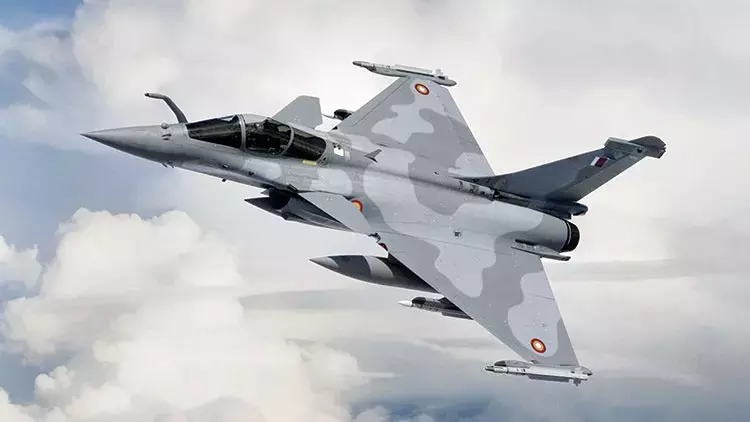

In [16]:
from IPython.display import Image
Image('savas_ucagi.jpg')

In [12]:
img=image.load_img('savas_ucagi.jpg',target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [13]:
model=ResNet50(weights='imagenet')

In [14]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


In [15]:
decode_predictions(pred,top=1)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


[[('n04552348', 'warplane', 0.9102802)]]